In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/08/2018 16:50:09 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/08/2018 16:50:14 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/08/2018 16:50:19 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


In [6]:
dtfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

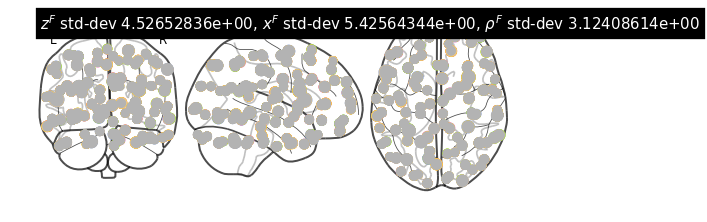

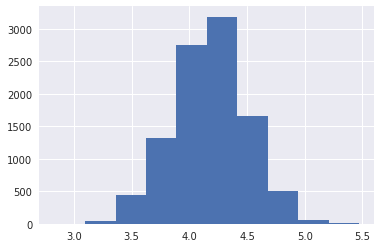

(<nilearn.plotting.displays.OrthoProjector at 0x7f4f64c9aa20>,
 tensor([[[-55.3008, -55.5590,  46.0366],
          [  4.2081,  10.9267,   4.3406],
          [-34.0236, -24.9573,  -9.0373],
          ...,
          [ 12.0303, -41.0428, -31.8928],
          [ -9.7103, -73.3821,  -8.0994],
          [-21.8590,  11.7107,  28.2034]],
 
         [[-55.2690, -55.2429,  45.0355],
          [  4.3266,  10.2333,   4.4762],
          [-34.7379, -24.6535,  -7.6781],
          ...,
          [ 11.5340, -41.8595, -32.1772],
          [ -9.8457, -73.2468,  -8.3072],
          [-21.5503,  11.3967,  28.4052]],
 
         [[-54.9057, -55.2831,  45.2860],
          [  4.3097,  10.6847,   4.5766],
          [-34.2136, -24.6520,  -8.1813],
          ...,
          [ 11.4025, -41.3912, -31.9855],
          [-10.0095, -73.3532,  -8.5183],
          [-21.6376,  11.6268,  28.4579]],
 
         ...,
 
         [[-54.6254, -55.3756,  45.2208],
          [  4.3221,  10.8247,   4.6590],
          [-34.0466, -24.65

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=500, learning_rate=1e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=100, use_cuda=True, blocks_batch_size=8, patience=30)

06/08/2018 16:52:23 [Epoch 1] (1485ms) Posterior free-energy 4.46261862e+09 = KL from prior 8.62536938e+05 - log-likelihood -4.46175590e+09
06/08/2018 16:52:25 [Epoch 2] (1285ms) Posterior free-energy 4.22366720e+09 = KL from prior 5.74482297e+05 - log-likelihood -4.22309261e+09
06/08/2018 16:52:26 [Epoch 3] (1284ms) Posterior free-energy 4.13763994e+09 = KL from prior 5.44044430e+05 - log-likelihood -4.13709606e+09
06/08/2018 16:52:27 [Epoch 4] (1270ms) Posterior free-energy 4.06327501e+09 = KL from prior 4.60584703e+05 - log-likelihood -4.06281446e+09
06/08/2018 16:52:29 [Epoch 5] (1281ms) Posterior free-energy 4.03764634e+09 = KL from prior 4.09870875e+05 - log-likelihood -4.03723674e+09
06/08/2018 16:52:30 [Epoch 6] (1281ms) Posterior free-energy 3.92509056e+09 = KL from prior 5.04121781e+05 - log-likelihood -3.92458650e+09
06/08/2018 16:52:31 [Epoch 7] (1281ms) Posterior free-energy 3.91108096e+09 = KL from prior 5.55457234e+05 - log-likelihood -3.91052544e+09
06/08/2018 16:52:33 

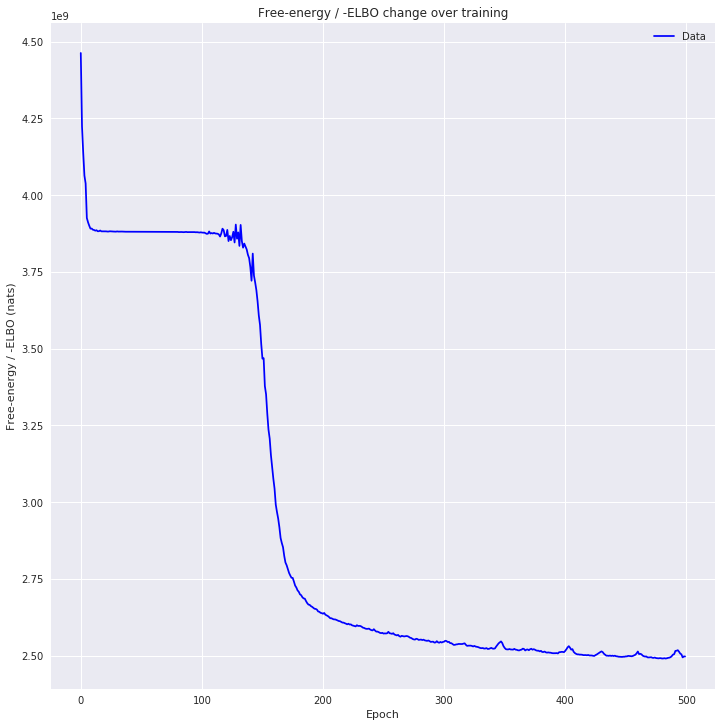

In [9]:
utils.plot_losses(losses)

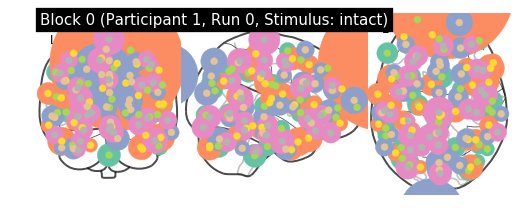

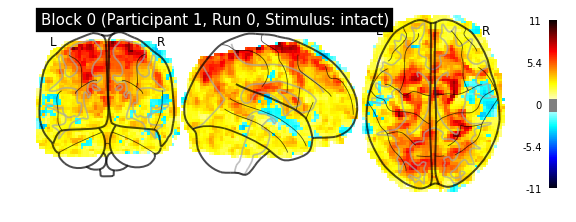

06/08/2018 17:03:20 Reconstruction Error (Frobenius Norm): 4.14148926e+03 out of 5.08479883e+03


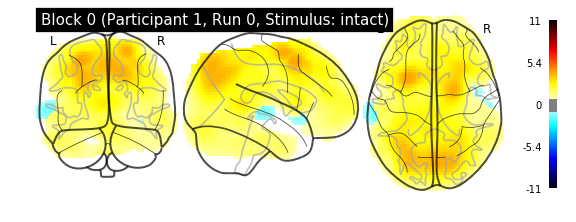

{'weights': tensor([[ 1.8954e+00,  3.3867e+00, -1.5210e-01,  ..., -9.0366e-01,
         -9.5780e-01,  2.6111e-01],
        [ 1.2386e+00,  1.2934e+00,  4.5748e-01,  ...,  1.0164e-01,
         -1.3617e+00,  1.6117e+00],
        [ 1.5951e+00, -3.5758e-02, -3.4820e-02,  ...,  1.2459e+00,
         -1.2250e+00,  1.5896e+00],
        ...,
        [ 8.2408e-01, -1.5969e-01, -1.1464e+00,  ..., -1.8000e+00,
          1.1910e+00,  4.0153e-01],
        [ 1.3032e+00, -6.5555e-01, -4.2892e-01,  ..., -6.5896e-01,
          2.8445e+00, -3.4639e-01],
        [ 1.3360e+00, -7.9101e-01, -1.7070e-01,  ..., -1.0762e+00,
          2.6414e+00,  2.5044e-01]]), 'factors': tensor([[ 0.0094,  0.0044,  0.0054,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

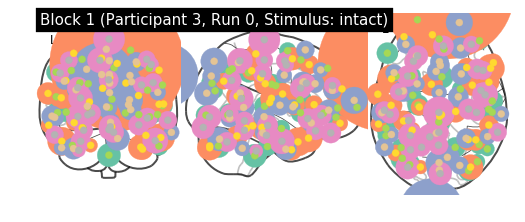

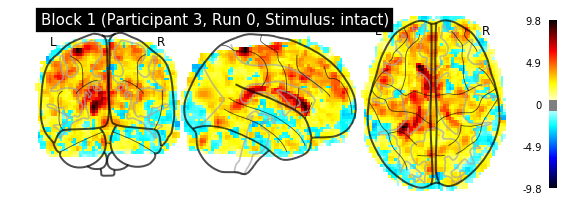

06/08/2018 17:03:50 Reconstruction Error (Frobenius Norm): 4.30339209e+03 out of 5.19534326e+03


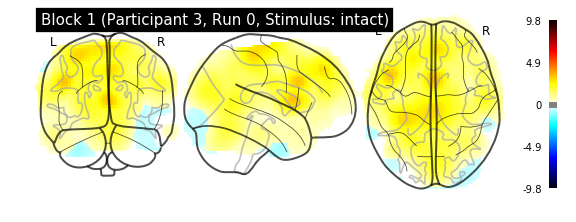

{'weights': tensor([[-1.4825e+00,  4.3188e+00,  4.7126e-01,  ...,  9.3873e-01,
          9.7344e-01, -7.7434e-01],
        [-2.7779e+00,  3.9155e-01, -1.6496e-01,  ..., -5.2339e-01,
         -5.3889e-01,  2.2964e-01],
        [-1.5525e+00,  3.2607e-01, -7.7274e-01,  ..., -9.9828e-02,
         -7.1273e-01,  4.5539e-01],
        ...,
        [ 2.0936e+00, -1.3143e+00,  3.6279e-01,  ..., -1.1383e-01,
          2.6865e+00, -1.6556e+00],
        [ 2.2752e+00, -1.4856e+00,  5.9296e-02,  ..., -5.1258e-01,
          2.1837e+00, -1.8457e+00],
        [ 1.9368e+00, -6.2744e-01, -1.2684e+00,  ..., -6.9626e-01,
          2.6885e+00, -2.2783e+00]]), 'factors': tensor([[ 0.0094,  0.0044,  0.0055,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

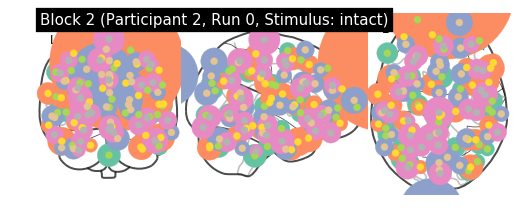

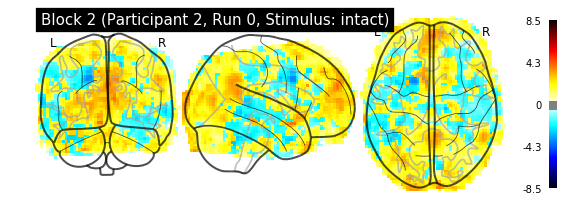

06/08/2018 17:04:17 Reconstruction Error (Frobenius Norm): 4.03781445e+03 out of 5.19534229e+03


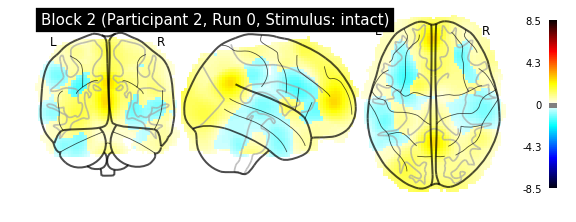

{'weights': tensor([[-9.4927e-01,  1.0322e+00, -7.4657e-01,  ..., -2.7104e-01,
          3.6947e-01, -2.3063e+00],
        [-2.5186e-01,  5.2767e-01, -1.0973e-01,  ..., -6.7499e-01,
          2.7246e-01, -6.4116e-01],
        [-2.8461e-01, -4.3080e-01, -5.1636e-01,  ...,  1.2407e-01,
         -1.0012e+00, -1.8402e-01],
        ...,
        [ 3.2422e-01, -4.9786e-01,  1.0009e+00,  ..., -7.5624e-01,
         -1.0019e+00,  9.1734e-02],
        [ 4.7665e-02, -4.5371e-01,  3.3183e-01,  ..., -1.3607e-01,
         -1.8423e+00, -1.2458e+00],
        [ 2.7488e-01, -6.8042e-01,  6.4240e-01,  ...,  3.8130e-01,
         -1.3809e+00, -9.5329e-01]]), 'factors': tensor([[ 0.0096,  0.0044,  0.0055,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [11]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


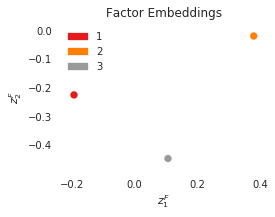

In [12]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


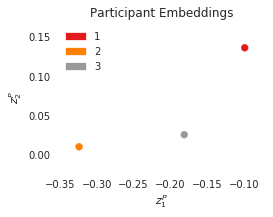

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


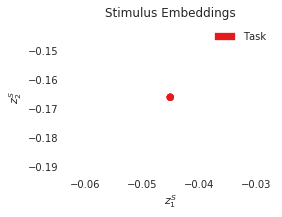

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

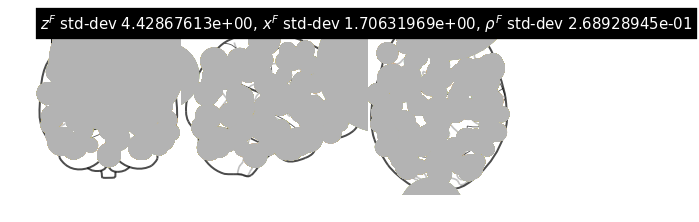

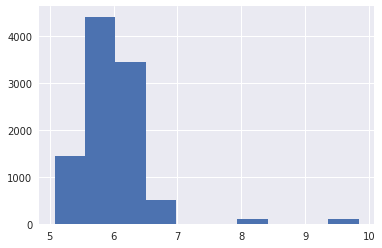

(<nilearn.plotting.displays.OrthoProjector at 0x7f4f1855b0b8>,
 tensor([[[-5.4981e+01, -4.1888e+01,  3.9458e+01],
          [ 3.8018e+00,  1.2523e+01,  1.0883e+01],
          [-2.6805e+01, -6.9803e+00, -1.9214e+01],
          ...,
          [ 7.8181e-01, -4.5933e+01, -2.1230e+01],
          [-1.7431e+01, -6.1665e+01, -3.6430e+00],
          [-3.2096e+01,  1.3102e+01,  2.3072e+01]],
 
         [[-5.4965e+01, -4.1910e+01,  3.9433e+01],
          [ 3.8069e+00,  1.2527e+01,  1.0868e+01],
          [-2.6816e+01, -6.9757e+00, -1.9216e+01],
          ...,
          [ 7.9441e-01, -4.5912e+01, -2.1250e+01],
          [-1.7414e+01, -6.1669e+01, -3.6527e+00],
          [-3.2098e+01,  1.3113e+01,  2.3065e+01]],
 
         [[-5.4867e+01, -4.1831e+01,  3.9246e+01],
          [ 3.8561e+00,  1.2535e+01,  1.0850e+01],
          [-2.6759e+01, -6.9932e+00, -1.9349e+01],
          ...,
          [ 7.3188e-01, -4.5879e+01, -2.1198e+01],
          [-1.7413e+01, -6.1720e+01, -3.6721e+00],
          [-3.2158e

In [15]:
dtfa.visualize_factor_embedding()